In [1]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd

# Zn major contracts 
## volume

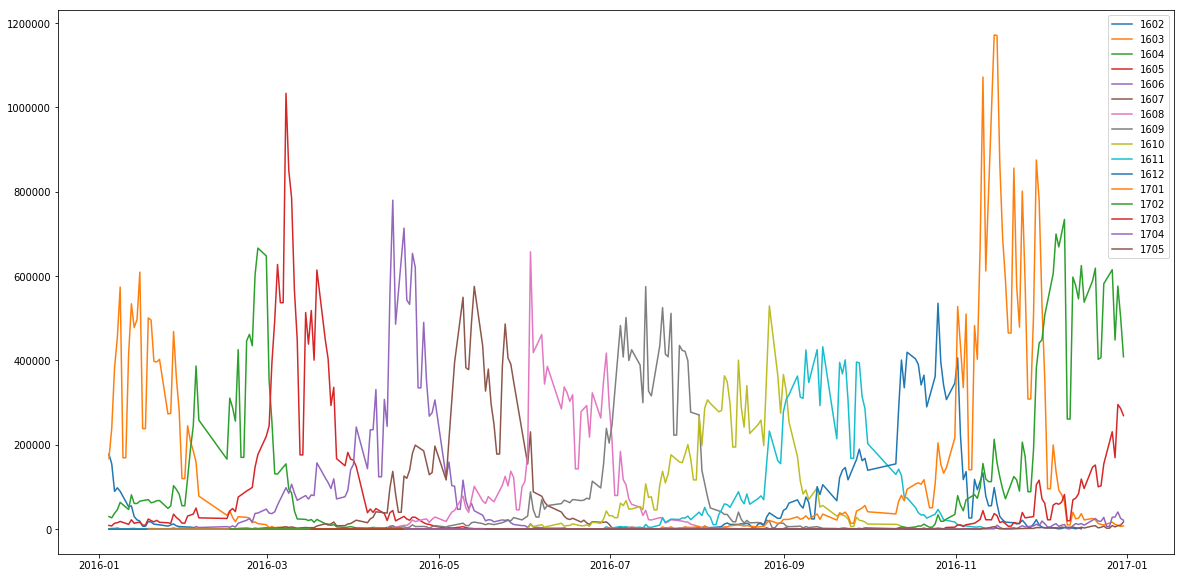

In [2]:
#zn
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Output"
fig = plt.figure(figsize = (20, 10))
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "zn_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 10000])>0:
            plt.plot(data.Date,data['AccVolume'],label=filename.split('_')[1])
plt.legend(loc='upper right')        
plt.show()

## price

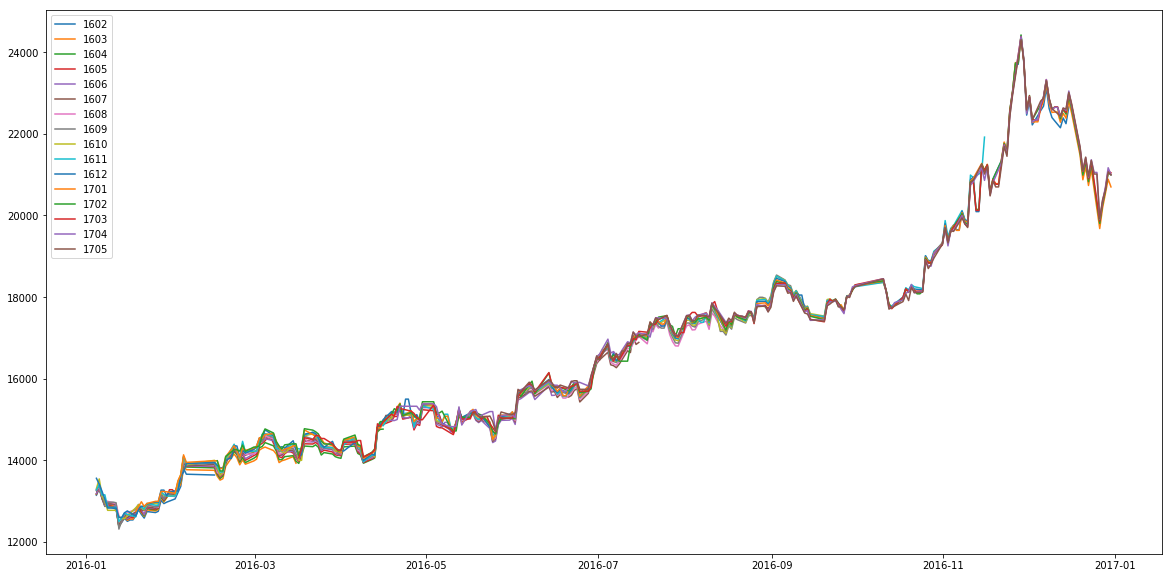

In [4]:
#ag
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Output"
fig = plt.figure(figsize = (20, 10))
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "zn_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 10000])>0:
            plt.plot(data.Date,data['LastPrice'],label=filename.split('_')[1])
plt.legend(loc='upper left')        
plt.show()

## bid-ask spread

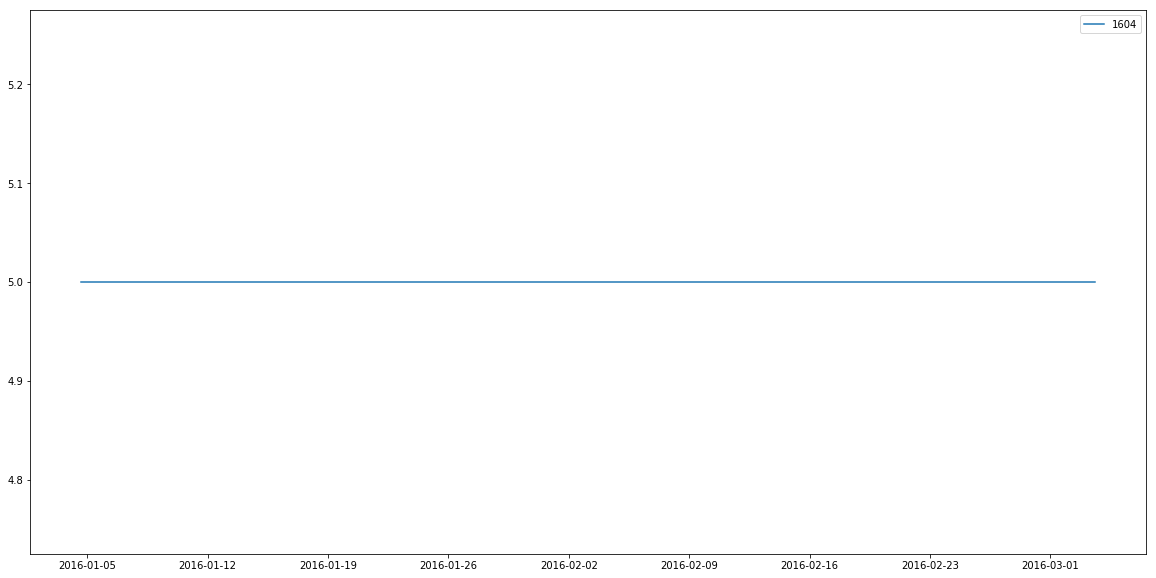

In [10]:
#ag
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Output"
fig = plt.figure(figsize = (20, 10))
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "zn_1604_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        data["Spread"] = data["AskPrice1"] - data["BidPrice1"]
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 10000])>0:
            plt.plot(data.loc[data['Spread']<10].Date,data.loc[data['Spread']<10]['Spread'],label=filename.split('_')[1])
plt.legend(loc='upper right')        
plt.show()

# Zn major contract
## volume

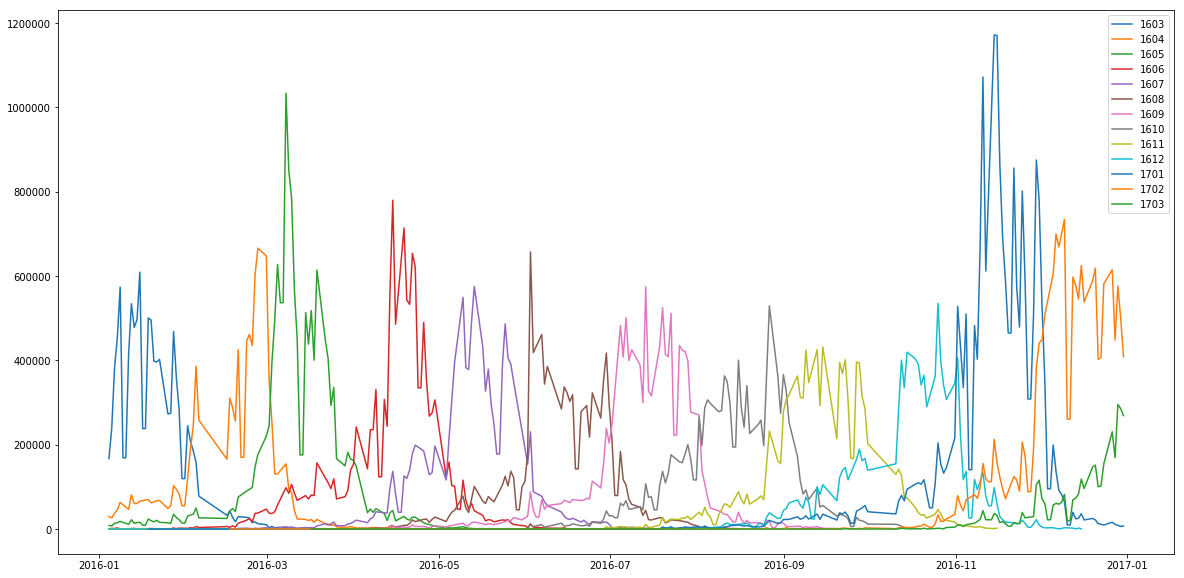

In [12]:
#bu
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Output"
fig = plt.figure(figsize = (20, 10))
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "zn_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 200000])>0:
            plt.plot(data.Date,data['AccVolume'],label=filename.split('_')[1])
plt.legend(loc='upper right')        
plt.show()

## price

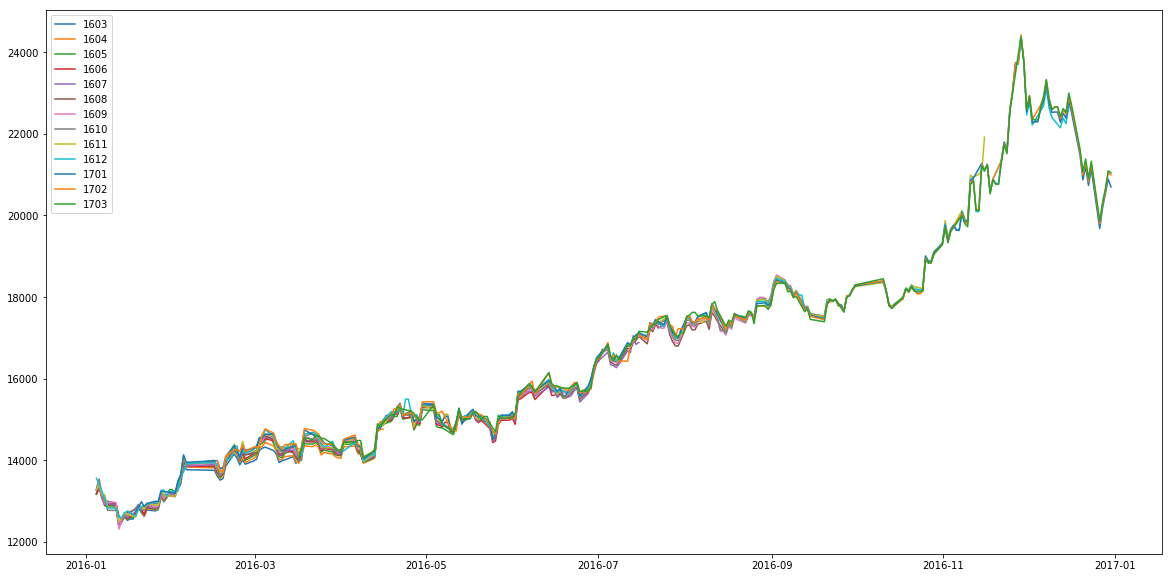

In [13]:
#bu
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Output"
fig = plt.figure(figsize = (20, 10))
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "zn_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 200000])>0:
            plt.plot(data.Date,data['LastPrice'],label=filename.split('_')[1])
plt.legend(loc='upper left')        
plt.show()

## bid-ask spread

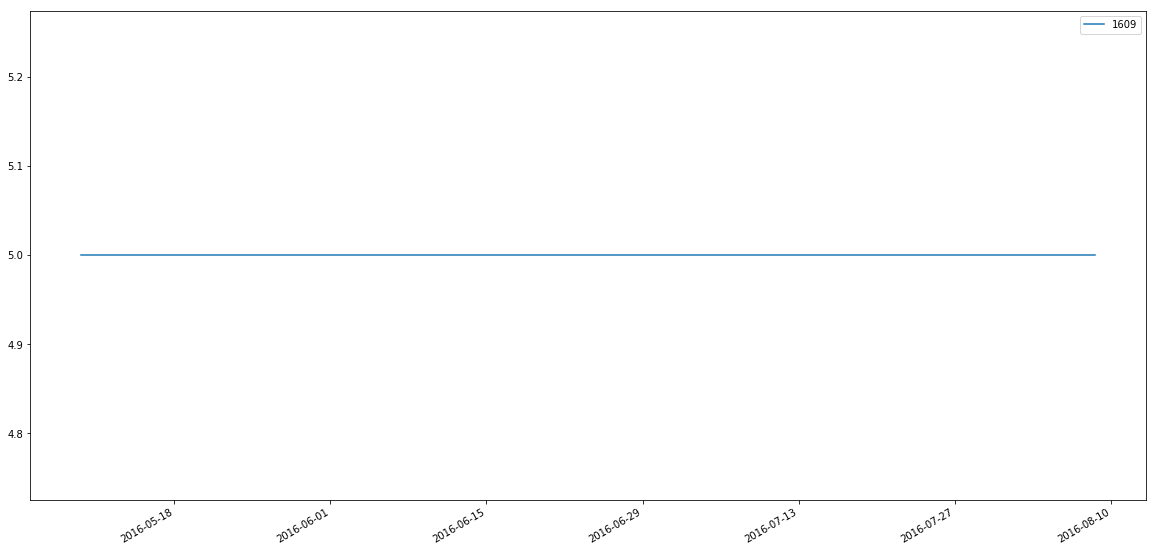

In [14]:
#bu
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Output"
fig = plt.figure(figsize = (20, 10))
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "zn_1609_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        data["Spread"] = data["AskPrice1"] - data["BidPrice1"]
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 200000])>0:
            plt.plot(data.loc[data['Spread']<10].Date,data.loc[data['Spread']<10]['Spread'],label=filename.split('_')[1])
fig.autofmt_xdate()
plt.legend(loc='upper right')        
plt.show()

# Model

In [2]:
import sys
sys.path.append("C:\\Users\\Maxcell-HomePC\\QishiQR")
import Utils.MajorContract_split
import importlib
importlib.reload(Utils.MajorContract_split)
from Utils.MajorContract_split import *
import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

## zn model

In [35]:
freq = 5
for offset in np.arange(0.1, freq, 1):
    print(offset)
    zn_train, zn_test, zn_probability_table = MajorContracts(symbol='zn', split_time = '2016-7-1', topdir=r'../Data',
                                                             maturity={'1603':['2016-1-1','2016-2-29'],
                                                                       '1604':['2016-2-1','2016-3-31'],
                                                                       '1605':['2016-3-1','2016-4-30'],
                                                                       '1606':['2016-4-1','2016-5-31'],
                                                                       '1607':['2016-5-1','2016-6-30'],
                                                                       '1608':['2016-6-1','2016-7-31'],
                                                                       '1609':['2016-7-1','2016-8-31'],
                                                                       '1610':['2016-8-1','2016-9-30'],
                                                                       '1611':['2016-9-1','2016-10-31'],
                                                                       '1612':['2016-10-1','2016-11-30'],
                                                                       '1701':['2016-11-1','2016-12-31'],
                                                                       '1702':['2016-12-1','2017-1-31'],
                                                                      },
                                                             transitions = {'1603':'2016-2-1', 
                                                                            '1604':'2016-3-1', 
                                                                            '1605':'2016-4-1', 
                                                                            '1606':'2016-5-1',
                                                                            '1607':'2016-6-1', 
                                                                            '1608':'2016-7-1', 
                                                                            '1609':'2016-8-1', 
                                                                            '1610':'2016-9-1',
                                                                            '1611':'2016-10-1', 
                                                                            '1612':'2016-11-1', 
                                                                            '1701':'2016-12-1', 
                                                                            '1702':'2017-1-1'
                                                                                     },
                                                             freq = freq, offset = offset).create_major_overlap()
    zn_test.to_csv(r'../Output/zn_major_' + str(freq) + '_' + str(offset) + '.csv')
    #for contract in ['1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612', '1701','1702']:
        #zn_probability_table[contract].to_csv(r'../Strategy/zn_'+ contract + '_major_strategy_' + str(freq) + '_' + str(offset) + '.csv', index=False)

0.1
zn1603 ../Data/zn
ID trade_range transition_begin transition_end
1603 ['2016-1-1', '2016-2-29'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160130.0
zn1604 ../Data/zn
ID trade_range transition_begin transition_end
1604 ['2016-2-1', '2016-3-31'] 2016-02-01 00:00:00 2016-03-01 00:00:00
probability table:  20160130.0 20160229.0
zn1605 ../Data/zn
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30'] 2016-03-01 00:00:00 2016-04-01 00:00:00
probability table:  20160301.0 20160331.0
zn1606 ../Data/zn
ID trade_range transition_begin transition_end
1606 ['2016-4-1', '2016-5-31'] 2016-04-01 00:00:00 2016-05-01 00:00:00
probability table:  20160401.0 20160429.0
zn1607 ../Data/zn
ID trade_range transition_begin transition_end
1607 ['2016-5-1', '2016-6-30'] 2016-05-01 00:00:00 2016-06-01 00:00:00
probability table:  20160503.0 20160531.0
zn1608 ../Data/zn
ID trade_range transition_begin transition_end
1608 ['2016-6-1', '2016-7-31'] 2016-06-01

zn1607 ../Data/zn
ID trade_range transition_begin transition_end
1607 ['2016-5-1', '2016-6-30'] 2016-05-01 00:00:00 2016-06-01 00:00:00
probability table:  20160503 20160531
zn1608 ../Data/zn
ID trade_range transition_begin transition_end
1608 ['2016-6-1', '2016-7-31'] 2016-06-01 00:00:00 2016-07-01 00:00:00
probability table:  20160601.0 20160630.0
zn1609 ../Data/zn
ID trade_range transition_begin transition_end
1609 ['2016-7-1', '2016-8-31'] 2016-07-01 00:00:00 2016-08-01 00:00:00
zn1610 ../Data/zn
ID trade_range transition_begin transition_end
1610 ['2016-8-1', '2016-9-30'] 2016-08-01 00:00:00 2016-09-01 00:00:00
zn1611 ../Data/zn
ID trade_range transition_begin transition_end
1611 ['2016-9-1', '2016-10-31'] 2016-09-01 00:00:00 2016-10-01 00:00:00
zn1612 ../Data/zn
ID trade_range transition_begin transition_end
1612 ['2016-10-1', '2016-11-30'] 2016-10-01 00:00:00 2016-11-01 00:00:00
zn1701 ../Data/zn
ID trade_range transition_begin transition_end
1701 ['2016-11-1', '2016-12-31'] 201

In [12]:
zn_test.to_csv(r'../Output/zn_major_' + str(freq) + '_' + str(offset) + '.csv')

In [39]:
#ag
filepath = "C:\\Users\\Maxcell-HomePC\\QishiQR\\Strategy"
fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "zn_*_major_strategy_5_*.1.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/zn_major_strategy.csv')
print(slm.head())

zn_1606_major_strategy_5_0.1.csv
zn_1606_major_strategy_5_1.1.csv
zn_1606_major_strategy_5_2.1.csv
zn_1606_major_strategy_5_3.1.csv
zn_1606_major_strategy_5_4.1.csv
zn_1607_major_strategy_5_0.1.csv
zn_1607_major_strategy_5_1.1.csv
zn_1607_major_strategy_5_2.1.csv
zn_1607_major_strategy_5_3.1.csv
zn_1607_major_strategy_5_4.1.csv
zn_1608_major_strategy_5_0.1.csv
zn_1608_major_strategy_5_1.1.csv
zn_1608_major_strategy_5_2.1.csv
zn_1608_major_strategy_5_3.1.csv
zn_1608_major_strategy_5_4.1.csv
zn_1609_major_strategy_5_0.1.csv
zn_1609_major_strategy_5_1.1.csv
zn_1609_major_strategy_5_2.1.csv
zn_1609_major_strategy_5_3.1.csv
zn_1609_major_strategy_5_4.1.csv
zn_1610_major_strategy_5_0.1.csv
zn_1610_major_strategy_5_1.1.csv
zn_1610_major_strategy_5_2.1.csv
zn_1610_major_strategy_5_3.1.csv
zn_1610_major_strategy_5_4.1.csv
zn_1611_major_strategy_5_0.1.csv
zn_1611_major_strategy_5_1.1.csv
zn_1611_major_strategy_5_2.1.csv
zn_1611_major_strategy_5_3.1.csv
zn_1611_major_strategy_5_4.1.csv
zn_1603_ma

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


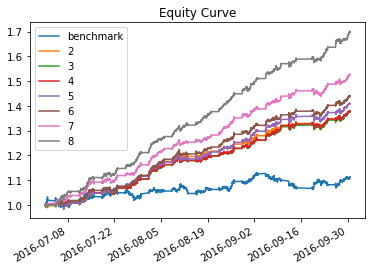

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.150260              0.004208                -0.001457   
1               0.157290              0.004216                -0.001558   
2               0.157854              0.004229                -0.001566   
3               0.152272              0.004521                -0.001558   
4               0.154348              0.004797                -0.001545   
5               0.164715              0.005570                -0.001508   
6               0.168760              0.006972                -0.001428   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000885                  0.000084             -0.015554   
1                 0.000864                  0.000108             -0.017178   
2                 0.000860                  0.000113             -0.017178   
3                 0.000869                  0.000116             -0.017178   
4        

In [37]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm, symbol='zn_major', data_type = 'Insample', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


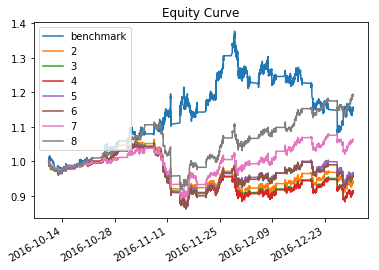

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.327846             -0.000893                -0.002844   
1               0.330999             -0.001327                -0.002969   
2               0.330416             -0.001320                -0.002978   
3               0.330828             -0.000496                -0.002973   
4               0.339800             -0.000594                -0.002988   
5               0.343551              0.000873                -0.002992   
6               0.375104              0.002496                -0.002789   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001474                 -0.000019             -0.039974   
1                 0.001461                 -0.000034             -0.045275   
2                 0.001460                 -0.000035             -0.045275   
3                 0.001480                 -0.000013             -0.045275   
4        

In [40]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm, symbol='zn_major', data_type = 'Outsample', data_dir=r'../Output',
                             valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

## Performance comparison

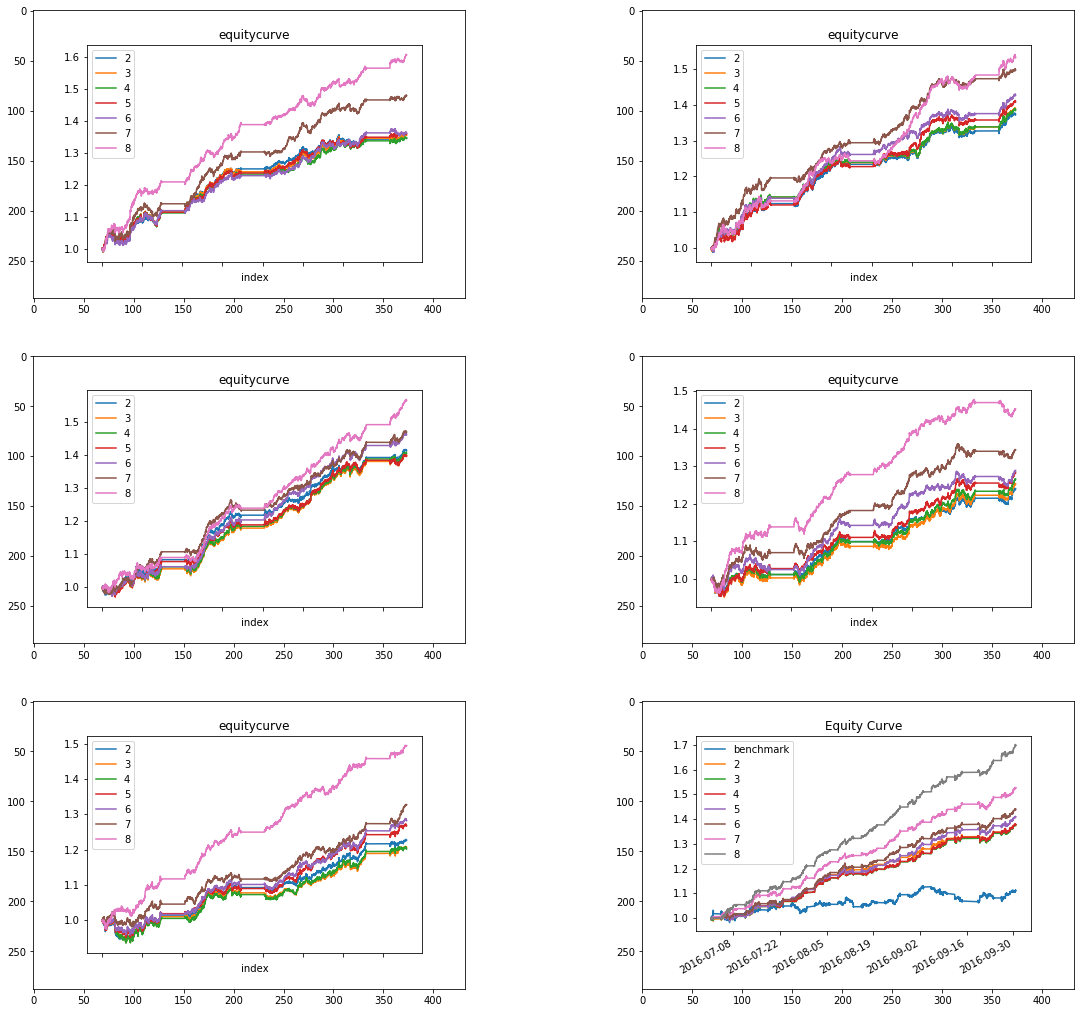

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1=mpimg.imread('../Validation/Insample/performance_zn_major_5_0.1.png')
img2=mpimg.imread('../Validation/Insample/performance_zn_major_5_1.1.png')
img3=mpimg.imread('../Validation/Insample/performance_zn_major_5_2.1.png')
img4=mpimg.imread('../Validation/Insample/performance_zn_major_5_3.1.png')
img5=mpimg.imread('../Validation/Insample/performance_zn_major_5_4.1.png')
img6=mpimg.imread('../Validation/Insample/performance_zn_major.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img1)
plt.subplot(322)
plt.imshow(img2)
plt.subplot(323)
plt.imshow(img3)
plt.subplot(324)
plt.imshow(img4)
plt.subplot(325)
plt.imshow(img5)
plt.subplot(326)
plt.imshow(img6)
plt.show()

In [46]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation/Insample/performance_zn_major_5_0.1.csv')
perform2 = pd.read_csv(r'../Validation/Insample/performance_zn_major_5_1.1.csv')
perform3 = pd.read_csv(r'../Validation/Insample/performance_zn_major_5_2.1.csv')
perform4 = pd.read_csv(r'../Validation/Insample/performance_zn_major_5_3.1.csv')
perform5 = pd.read_csv(r'../Validation/Insample/performance_zn_major_5_4.1.csv')
perform6 = pd.read_csv(r'../Validation/Insample/performance_zn_major.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)
display(perform6)

,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.157372,0.004535,-0.001479,0.000925,0.000090,-0.015583,0.013936,-0.043463,0.625574,7.203634,3813,1.344629,0.465775
1,1,0.165473,0.004671,-0.001570,0.000900,0.000120,-0.015583,0.013936,-0.040775,0.573336,7.056899,2950,1.354988,0.645085
2,2,0.165857,0.004556,-0.001600,0.000891,0.000123,-0.015583,0.013936,-0.042474,0.557070,6.867510,2819,1.346264,0.683576
3,3,0.163442,0.004728,-0.001589,0.000902,0.000123,-0.015583,0.013936,-0.040387,0.567724,7.231976,2933,1.359330,0.649847
4,4,0.155679,0.004754,-0.001604,0.000908,0.000122,-0.015583,0.013936,-0.037998,0.566141,7.633840,2964,1.361282,0.641363
5,5,0.181460,0.006298,-0.001560,0.000979,0.000163,-0.015583,0.013936,-0.037534,0.627657,8.676756,2936,1.478644,0.630450
6,6,0.183881,0.007968,-0.001473,0.001038,0.000200,-0.015583,0.013936,-0.026401,0.704374,10.833288,3023,1.605580,0.615283


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.146908,0.004910,-0.001459,0.000894,0.000097,-0.015337,0.007010,-0.026792,0.613003,8.355709,3854,1.373166,0.474831
1,1,0.152811,0.005096,-0.001572,0.000874,0.000129,-0.015337,0.010984,-0.031083,0.555850,8.337756,2993,1.387328,0.657200
2,2,0.153064,0.005076,-0.001561,0.000872,0.000135,-0.015337,0.010984,-0.031307,0.558699,8.291200,2861,1.385802,0.688920
3,3,0.147339,0.005378,-0.001538,0.000885,0.000137,-0.015337,0.010984,-0.027955,0.575108,9.125787,2990,1.408753,0.653512
4,4,0.156433,0.005620,-0.001519,0.000890,0.000141,-0.015337,0.010984,-0.024228,0.585876,8.981008,3038,1.427097,0.642857
5,5,0.170540,0.006539,-0.001496,0.000945,0.000169,-0.014765,0.009507,-0.026828,0.631871,9.586041,2938,1.496980,0.634105
6,6,0.170533,0.006997,-0.001477,0.001005,0.000181,-0.014765,0.009507,-0.028799,0.680615,10.258076,2945,1.531799,0.618676


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.149654,0.005449,-0.001421,0.000895,0.000108,-0.015055,0.010585,-0.026228,0.630367,9.102297,3835,1.414108,0.480052
1,1,0.149167,0.005253,-0.001522,0.000880,0.000134,-0.016454,0.010585,-0.026498,0.578261,8.803636,2989,1.399217,0.651054
2,2,0.149485,0.005340,-0.001518,0.000876,0.000140,-0.016454,0.010585,-0.025964,0.577284,8.930990,2889,1.405855,0.680166
3,3,0.144721,0.005235,-0.001532,0.000874,0.000132,-0.016454,0.010585,-0.029131,0.570581,9.043301,3011,1.397861,0.650614
4,4,0.146576,0.006088,-0.001503,0.000882,0.000152,-0.016454,0.010585,-0.031339,0.586544,10.384092,3051,1.462706,0.650934
5,5,0.155136,0.006183,-0.001503,0.000945,0.000162,-0.016454,0.010585,-0.026468,0.628597,9.964554,2901,1.469941,0.630472
6,6,0.154151,0.007443,-0.001434,0.000982,0.000185,-0.016454,0.010585,-0.025480,0.684722,12.070773,3056,1.565661,0.614856


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.146865,0.003163,-0.001444,0.000875,0.000064,-0.015067,0.009384,-0.046692,0.605920,5.383654,3762,1.240365,0.461722
1,1,0.158560,0.003337,-0.001568,0.000857,0.000086,-0.018697,0.009384,-0.049041,0.546511,5.261786,2936,1.253629,0.635559
2,2,0.156667,0.003501,-0.001569,0.000852,0.000095,-0.018697,0.009384,-0.048787,0.543136,5.587287,2800,1.266104,0.675714
3,3,0.153721,0.003730,-0.001571,0.000862,0.000096,-0.018697,0.009726,-0.051739,0.548333,6.066396,2938,1.283490,0.640231
4,4,0.160592,0.003799,-0.001550,0.000862,0.000096,-0.018126,0.009384,-0.052415,0.556457,5.913309,3004,1.288687,0.629494
5,5,0.166613,0.004523,-0.001546,0.000929,0.000121,-0.014760,0.009726,-0.036803,0.601118,6.786584,2832,1.343743,0.617585
6,6,0.181719,0.005953,-0.001400,0.000977,0.000152,-0.014505,0.013460,-0.039155,0.697614,8.189524,2980,1.452410,0.591275


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.150503,0.002985,-0.001482,0.000835,0.000060,-0.016726,0.010017,-0.060726,0.563689,4.959078,3806,1.226893,0.466632
1,1,0.160441,0.002722,-0.001556,0.000808,0.000070,-0.019819,0.010017,-0.063967,0.519557,4.241825,2944,1.206892,0.641984
2,2,0.164198,0.002672,-0.001584,0.000808,0.000073,-0.019819,0.010017,-0.069095,0.510076,4.068925,2797,1.203106,0.680729
3,3,0.152135,0.003533,-0.001560,0.000824,0.000092,-0.019819,0.010017,-0.051424,0.527881,5.805379,2928,1.268493,0.650273
4,4,0.152459,0.003723,-0.001548,0.000835,0.000095,-0.019819,0.010017,-0.046474,0.539043,6.104549,2992,1.282930,0.635361
5,5,0.149828,0.004305,-0.001437,0.000891,0.000113,-0.016726,0.010017,-0.041857,0.620445,7.182878,2889,1.327163,0.611284
6,6,0.153514,0.006498,-0.001355,0.000971,0.000163,-0.016726,0.012848,-0.027340,0.716424,10.581894,3029,1.493838,0.586332


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.150260,0.004208,-0.001457,0.000885,0.000084,-0.015554,0.010186,-0.040780,0.607710,7.000874,3814.0,1.319832,0.469803
1,1,0.157290,0.004216,-0.001558,0.000864,0.000108,-0.017178,0.010981,-0.042273,0.554703,6.740381,2962.4,1.320411,0.646176
2,2,0.157854,0.004229,-0.001566,0.000860,0.000113,-0.017178,0.010981,-0.043525,0.549253,6.749183,2833.2,1.321426,0.681821
3,3,0.152272,0.004521,-0.001558,0.000869,0.000116,-0.017178,0.011050,-0.040127,0.557925,7.454568,2960.0,1.343586,0.648895
4,4,0.154348,0.004797,-0.001545,0.000875,0.000121,-0.017064,0.010981,-0.038491,0.566812,7.803360,3009.8,1.364540,0.640002
5,5,0.164715,0.005570,-0.001508,0.000938,0.000146,-0.015658,0.010754,-0.033898,0.621938,8.439363,2899.2,1.423294,0.624779
6,6,0.168760,0.006972,-0.001428,0.000994,0.000176,-0.015607,0.012067,-0.029435,0.696750,10.386711,3006.6,1.529857,0.605284


In [47]:
#Outsample

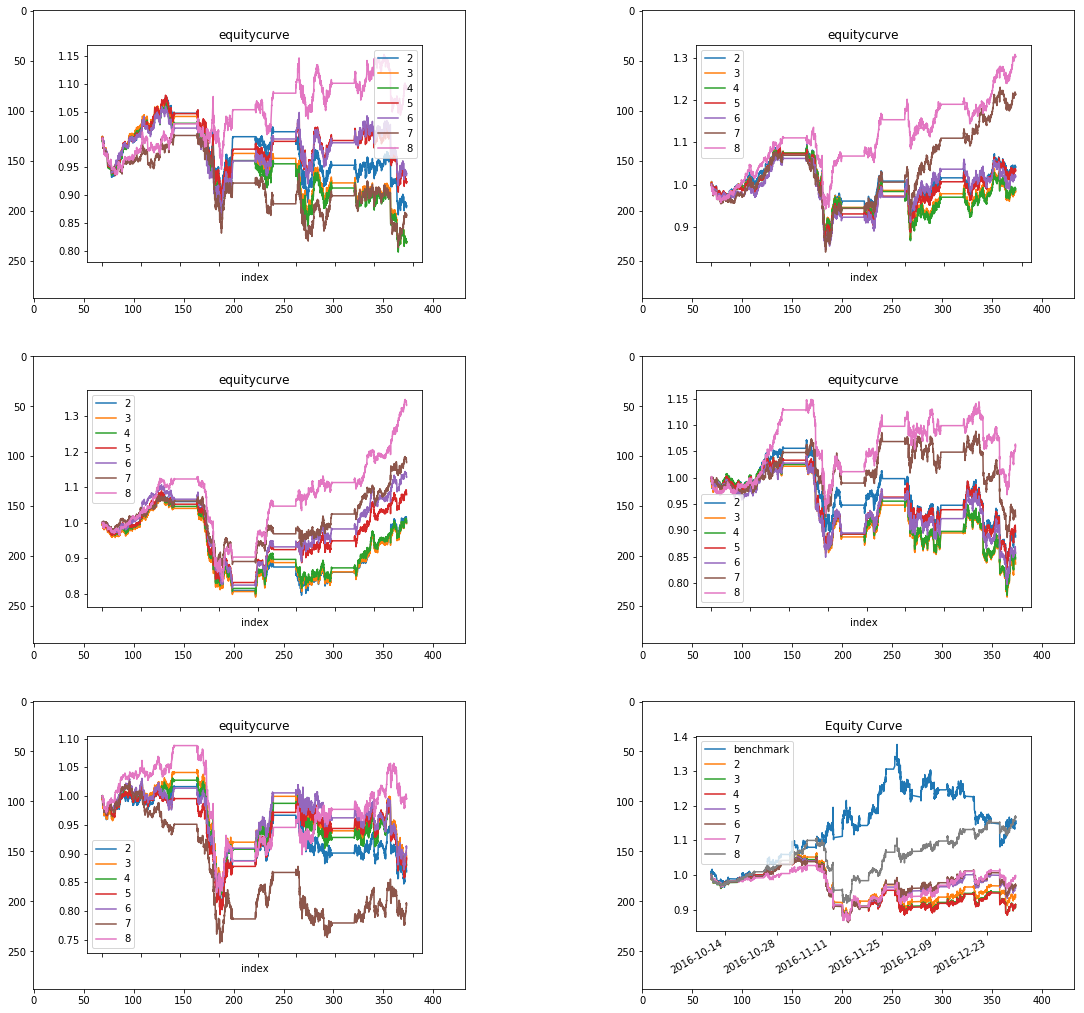

In [49]:
img1=mpimg.imread('../Validation/Outsample/performance_zn_major_5_0.1.png')
img2=mpimg.imread('../Validation/Outsample/performance_zn_major_5_1.1.png')
img3=mpimg.imread('../Validation/Outsample/performance_zn_major_5_2.1.png')
img4=mpimg.imread('../Validation/Outsample/performance_zn_major_5_3.1.png')
img5=mpimg.imread('../Validation/Outsample/performance_zn_major_5_4.1.png')
img6=mpimg.imread('../Validation/Outsample/performance_zn_major.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img1)
plt.subplot(322)
plt.imshow(img2)
plt.subplot(323)
plt.imshow(img3)
plt.subplot(324)
plt.imshow(img4)
plt.subplot(325)
plt.imshow(img5)
plt.subplot(326)
plt.imshow(img6)
plt.show()

In [50]:
perform1 = pd.read_csv(r'../Validation/Outsample/performance_zn_major_5_0.1.csv')
perform2 = pd.read_csv(r'../Validation/Outsample/performance_zn_major_5_1.1.csv')
perform3 = pd.read_csv(r'../Validation/Outsample/performance_zn_major_5_2.1.csv')
perform4 = pd.read_csv(r'../Validation/Outsample/performance_zn_major_5_3.1.csv')
perform5 = pd.read_csv(r'../Validation/Outsample/performance_zn_major_5_4.1.csv')
perform6 = pd.read_csv(r'../Validation/Outsample/performance_zn_major.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)
display(perform6)

,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.339762,-0.001684,-0.002902,0.001519,-0.000036,-0.054359,0.015606,-0.197078,0.523306,-1.239139,3287,0.880433,0.526012
1,1,0.331421,-0.002595,-0.003057,0.001495,-0.000067,-0.054359,0.015606,-0.251947,0.489116,-1.957454,2770,0.815757,0.638989
2,2,0.332505,-0.002598,-0.003060,0.001494,-0.000068,-0.054359,0.015606,-0.252332,0.488295,-1.953054,2720,0.815570,0.652574
3,3,0.342321,-0.001080,-0.003039,0.001534,-0.000028,-0.054359,0.015606,-0.183305,0.504659,-0.788992,2769,0.923295,0.640303
4,4,0.354285,-0.000865,-0.003061,0.001541,-0.000022,-0.054359,0.015606,-0.191440,0.503352,-0.610497,2788,0.938574,0.634864
5,5,0.356640,-0.001918,-0.003130,0.001525,-0.000052,-0.054359,0.018259,-0.202679,0.487343,-1.344217,2630,0.863850,0.630798
6,6,0.382507,0.001310,-0.002825,0.001679,0.000034,-0.054359,0.018261,-0.121599,0.594225,0.856139,2775,1.093004,0.603964


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.326922,0.000599,-0.002917,0.001496,0.000013,-0.034193,0.019704,-0.200709,0.512780,0.457737,3292,1.042499,0.536452
1,1,0.339445,-0.000206,-0.003084,0.001473,-0.000005,-0.037329,0.019704,-0.200344,0.477614,-0.151697,2772,0.985376,0.656566
2,2,0.340339,-0.000133,-0.003090,0.001467,-0.000003,-0.037329,0.019704,-0.204671,0.474829,-0.097921,2720,0.990535,0.672794
3,3,0.336387,0.000490,-0.003077,0.001474,0.000013,-0.037329,0.019704,-0.208025,0.479146,0.364448,2772,1.034817,0.660534
4,4,0.341411,0.000291,-0.003054,0.001495,0.000007,-0.037329,0.019704,-0.211695,0.489642,0.212997,2806,1.020652,0.644690
5,5,0.354206,0.003015,-0.002909,0.001587,0.000081,-0.038612,0.019704,-0.219614,0.545640,2.127875,2658,1.214052,0.635440
6,6,0.380126,0.004268,-0.002735,0.001630,0.000108,-0.034193,0.019704,-0.169620,0.595841,2.807113,2806,1.303044,0.616536


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.340038,0.000061,-0.002785,0.001490,1.317054e-06,-0.030025,0.023036,-0.268160,0.534813,0.044774,3283,1.004324,0.525434
1,1,0.337441,-0.000029,-0.002886,0.001494,-7.397456e-07,-0.037068,0.023036,-0.266280,0.517759,-0.021343,2765,0.997955,0.637251
2,2,0.335577,-0.000003,-0.002897,0.001492,-7.264677e-08,-0.037068,0.023036,-0.262546,0.514959,-0.002063,2707,0.999803,0.652752
3,3,0.342539,0.001116,-0.002892,0.001519,2.871701e-05,-0.037068,0.023036,-0.243626,0.525347,0.814150,2758,1.079202,0.642132
4,4,0.357932,0.001802,-0.002893,0.001520,4.559363e-05,-0.037068,0.023036,-0.261899,0.525204,1.258558,2806,1.127936,0.639344
5,5,0.336727,0.002385,-0.002873,0.001591,6.428576e-05,-0.030025,0.023036,-0.185198,0.553902,1.770655,2634,1.169329,0.626424
6,6,0.409339,0.004643,-0.002753,0.001695,1.184586e-04,-0.033491,0.023036,-0.261231,0.615686,2.835818,2783,1.329670,0.607977


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.311038,-0.001586,-0.002830,0.001433,-0.000034,-0.041793,0.016854,-0.227179,0.506202,-1.274426,3318,0.887424,0.521097
1,1,0.319332,-0.002308,-0.002961,0.001404,-0.000059,-0.041793,0.014760,-0.254191,0.474086,-1.806743,2754,0.836146,0.649237
2,2,0.319422,-0.002168,-0.002961,0.001408,-0.000057,-0.041793,0.014760,-0.253236,0.475397,-1.697189,2709,0.846038,0.660022
3,3,0.316967,-0.001448,-0.002963,0.001423,-0.000037,-0.041793,0.014760,-0.210688,0.480411,-1.142167,2775,0.897184,0.647568
4,4,0.327926,-0.002022,-0.002951,0.001421,-0.000051,-0.041793,0.016854,-0.233956,0.481371,-1.541543,2799,0.856434,0.635584
5,5,0.348120,-0.001047,-0.002968,0.001474,-0.000028,-0.040888,0.016854,-0.185374,0.496706,-0.751614,2663,0.925691,0.631243
6,6,0.374991,0.000824,-0.002799,0.001604,0.000021,-0.040888,0.016854,-0.188031,0.572997,0.549225,2736,1.058491,0.607822


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.321469,-0.001855,-0.002787,0.001433,-0.000040,-0.039502,0.01593,-0.215071,0.514100,-1.442764,3288,0.868280,0.522810
1,1,0.327355,-0.001495,-0.002858,0.001440,-0.000038,-0.055828,0.01500,-0.205407,0.503884,-1.141776,2789,0.893850,0.633202
2,2,0.324234,-0.001700,-0.002884,0.001439,-0.000044,-0.055828,0.01500,-0.206644,0.498957,-1.310575,2715,0.879319,0.652670
3,3,0.315926,-0.001560,-0.002894,0.001447,-0.000040,-0.055828,0.01500,-0.225161,0.500133,-1.234082,2778,0.889274,0.635349
4,4,0.319093,-0.001275,-0.002878,0.001452,-0.000032,-0.055828,0.01593,-0.198171,0.504268,-0.998841,2819,0.909483,0.627882
5,5,0.315430,-0.002669,-0.002903,0.001496,-0.000073,-0.039502,0.01593,-0.274621,0.515248,-2.115444,2590,0.810494,0.613514
6,6,0.347687,-0.000064,-0.002850,0.001593,-0.000002,-0.039502,0.01593,-0.238510,0.558934,-0.045739,2708,0.995484,0.604136


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.327846,-0.000893,-0.002844,0.001474,-0.000019,-0.039974,0.018226,-0.221639,0.518240,-0.690763,3293.6,0.936592,0.526361
1,1,0.330999,-0.001327,-0.002969,0.001461,-0.000034,-0.045275,0.017621,-0.235634,0.492492,-1.015803,2770.0,0.905817,0.643049
2,2,0.330416,-0.001320,-0.002978,0.001460,-0.000035,-0.045275,0.017621,-0.235886,0.490487,-1.012160,2714.2,0.906253,0.658162
3,3,0.330828,-0.000496,-0.002973,0.001480,-0.000013,-0.045275,0.017621,-0.214161,0.497939,-0.397328,2770.4,0.964754,0.645177
4,4,0.340129,-0.000414,-0.002968,0.001486,-0.000010,-0.045275,0.018226,-0.219432,0.500767,-0.335865,2803.6,0.970616,0.636473
5,5,0.342225,-0.000047,-0.002957,0.001535,-0.000002,-0.040677,0.018756,-0.213497,0.519768,-0.062549,2635.0,0.996683,0.627484
6,6,0.378930,0.002196,-0.002793,0.001640,0.000056,-0.040486,0.018757,-0.195798,0.587537,1.400511,2761.6,1.155939,0.608087


## Comparison: use last 6 months data or Jan to June data for outsample testing 

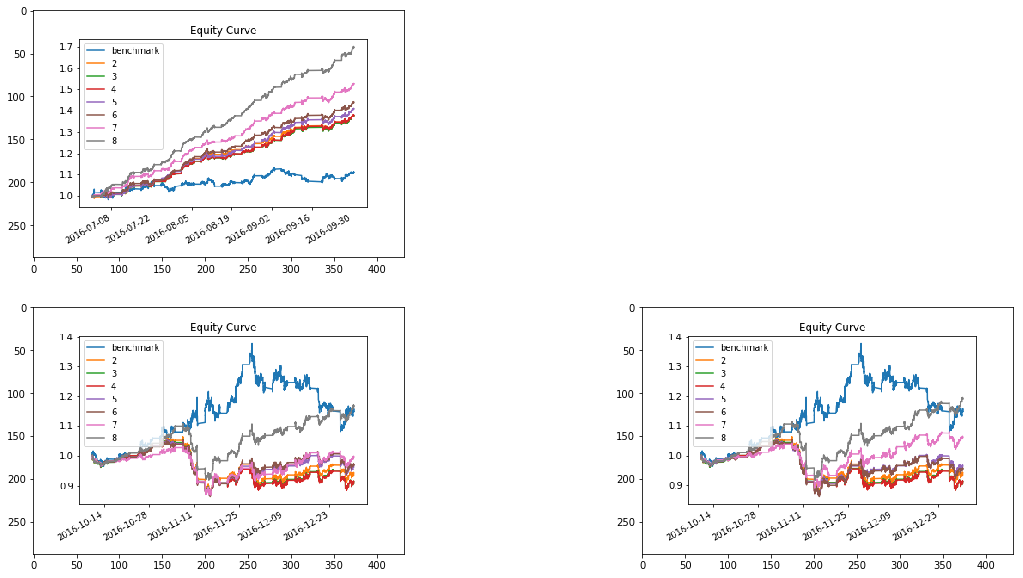

In [55]:
img6_0=mpimg.imread('../Validation/Insample/performance_zn_major.png')
img6_1=mpimg.imread('../Validation/Outsample/performance_zn_major.png')
img6_2=mpimg.imread('../Validation/Outsample_Ref/performance_zn_major.png')
fig = plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(img6_0)
plt.subplot(223)
plt.imshow(img6_1)
plt.subplot(224)
plt.imshow(img6_2)
plt.show()

In [56]:
perform1 = pd.read_csv(r'../Validation/Insample/performance_zn_major.csv')
perform2 = pd.read_csv(r'../Validation/Outsample/performance_zn_major.csv')
perform3 = pd.read_csv(r'../Validation/Outsample_Ref/performance_zn_major.csv')
display(perform1)
display(perform2)
display(perform3)

,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.150260,0.004208,-0.001457,0.000885,0.000084,-0.015554,0.010186,-0.040780,0.607710,7.000874,3814.0,1.319832,0.469803
1,1,0.157290,0.004216,-0.001558,0.000864,0.000108,-0.017178,0.010981,-0.042273,0.554703,6.740381,2962.4,1.320411,0.646176
2,2,0.157854,0.004229,-0.001566,0.000860,0.000113,-0.017178,0.010981,-0.043525,0.549253,6.749183,2833.2,1.321426,0.681821
3,3,0.152272,0.004521,-0.001558,0.000869,0.000116,-0.017178,0.011050,-0.040127,0.557925,7.454568,2960.0,1.343586,0.648895
4,4,0.154348,0.004797,-0.001545,0.000875,0.000121,-0.017064,0.010981,-0.038491,0.566812,7.803360,3009.8,1.364540,0.640002
5,5,0.164715,0.005570,-0.001508,0.000938,0.000146,-0.015658,0.010754,-0.033898,0.621938,8.439363,2899.2,1.423294,0.624779
6,6,0.168760,0.006972,-0.001428,0.000994,0.000176,-0.015607,0.012067,-0.029435,0.696750,10.386711,3006.6,1.529857,0.605284


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.327846,-0.000893,-0.002844,0.001474,-0.000019,-0.039974,0.018226,-0.221639,0.518240,-0.690763,3293.6,0.936592,0.526361
1,1,0.330999,-0.001327,-0.002969,0.001461,-0.000034,-0.045275,0.017621,-0.235634,0.492492,-1.015803,2770.0,0.905817,0.643049
2,2,0.330416,-0.001320,-0.002978,0.001460,-0.000035,-0.045275,0.017621,-0.235886,0.490487,-1.012160,2714.2,0.906253,0.658162
3,3,0.330828,-0.000496,-0.002973,0.001480,-0.000013,-0.045275,0.017621,-0.214161,0.497939,-0.397328,2770.4,0.964754,0.645177
4,4,0.340129,-0.000414,-0.002968,0.001486,-0.000010,-0.045275,0.018226,-0.219432,0.500767,-0.335865,2803.6,0.970616,0.636473
5,5,0.342225,-0.000047,-0.002957,0.001535,-0.000002,-0.040677,0.018756,-0.213497,0.519768,-0.062549,2635.0,0.996683,0.627484
6,6,0.378930,0.002196,-0.002793,0.001640,0.000056,-0.040486,0.018757,-0.195798,0.587537,1.400511,2761.6,1.155939,0.608087


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.327846,-0.000893,-0.002844,0.001474,-0.000019,-0.039974,0.018226,-0.221639,0.518240,-0.690763,3293.6,0.936592,0.526361
1,1,0.330999,-0.001327,-0.002969,0.001461,-0.000034,-0.045275,0.017621,-0.235634,0.492492,-1.015803,2770.0,0.905817,0.643049
2,2,0.330416,-0.001320,-0.002978,0.001460,-0.000035,-0.045275,0.017621,-0.235886,0.490487,-1.012160,2714.2,0.906253,0.658162
3,3,0.330828,-0.000496,-0.002973,0.001480,-0.000013,-0.045275,0.017621,-0.214161,0.497939,-0.397328,2770.4,0.964754,0.645177
4,4,0.339800,-0.000594,-0.002988,0.001485,-0.000015,-0.045275,0.018226,-0.225943,0.497354,-0.463969,2778.4,0.957796,0.636713
5,5,0.343551,0.000873,-0.002992,0.001551,0.000023,-0.040677,0.018756,-0.191140,0.518966,0.598167,2584.0,1.061948,0.637083
6,6,0.375104,0.002496,-0.002789,0.001651,0.000064,-0.040486,0.021672,-0.201138,0.592193,1.638334,2748.0,1.177239,0.607933
